In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
import plotly.express as px
from plotly import graph_objects as go
import folium
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
from sklearn.preprocessing import scale
import urllib, json
from datetime import datetime
from sklearn.preprocessing import scale
import math
from plotly.subplots import make_subplots
plt.rcParams['font.family'] = 'Malgun Gothic' ## 그래프에서 한글보이도록 폰트설정

In [67]:
Time = pd.read_csv("./data/COVID_19/time.csv")
Time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [68]:
confirmed = list(Time['confirmed'])
increase = []
num = []
for i in range(len(confirmed)-1):
    increase.append(confirmed[i+1] - confirmed[i])
    num.append(i)

In [72]:
idx = pd.to_datetime(Time['date'])
idx = idx.head(-1) 
ts = pd.Series(increase,idx)
t= ts.resample('W').sum()
m = ts.resample('M').sum()
d = ts.resample('D').sum()

In [73]:
df_confirmed_W = pd.DataFrame()
df_confirmed_W['W']=t
df_confirmed_M = pd.DataFrame()
df_confirmed_M['M'] = m
df_confirmed_D = pd.DataFrame()
df_confirmed_D['D'] = d

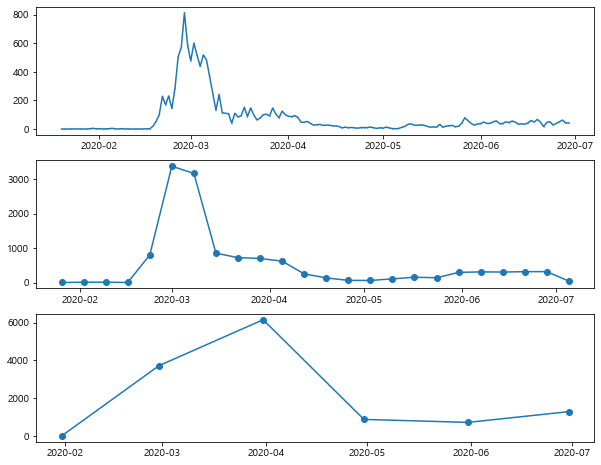

In [74]:
fig, ax = plt.subplots(3,1,figsize=(10,8))

ax[0].plot(df_confirmed_D.index, df_confirmed_D['D'], marker='o', markersize=0.2)
ax[1].plot(df_confirmed_W.index, df_confirmed_W['W'],marker='o')
ax[2].plot(df_confirmed_M.index, df_confirmed_M['M'],marker='o')

plt.show()

In [76]:
delivery = pd.read_csv("./data/delivery.csv")
delivery

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158319,10672688,2020-06-21,C000312,1,C000312,S0029529,야식,4125010200,경기도,동두천시,...,D0013004,3000,500,26000,1,승인:하나카드,2020-06-21 22:48:22,2020-06-21 22:48:37,2020-06-21 23:07:47,NaN
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
5158321,10672690,2020-06-21,C000130,1,C000130,S0042234,야식,4128112300,경기도,고양시 덕양구,...,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN
5158322,10672691,2020-06-21,C000237,1,C000237,S0021766,족발/보쌈,4121010200,경기도,광명시,...,D0004485,3630,200,53700,1,승인:비씨카드사,2020-06-21 23:10:38,2020-06-21 23:11:03,2020-06-21 23:25:10,NaN


In [77]:
delivery2 = delivery.groupby('SETLE_KND_VALUE').count()
delivery2['Ratio'] = delivery2['SERIAL_NUMBER']/5158324 *100
delivery2

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,Ratio
SETLE_KND_VALUE,,,,,,,,,,,,,,,,,,,,,
1,1614705,1614705,1614705,1614705,1595559,1614705,1614705,1614705,1614705,1614705,...,1614705,1614705,1614705,1614705,1588547,1614705,1595944,1589077,26900,31.302900
2,3022488,3022488,3022488,3022488,2986393,3022488,3022488,3022488,3022488,3022488,...,3022488,3022488,3022488,3022488,9747,3022488,2986961,2955326,46527,58.594381
3,521131,521131,521131,521131,513478,521131,521131,521131,521131,521131,...,521131,521131,521131,521131,18695,521131,513618,510681,10173,10.102719


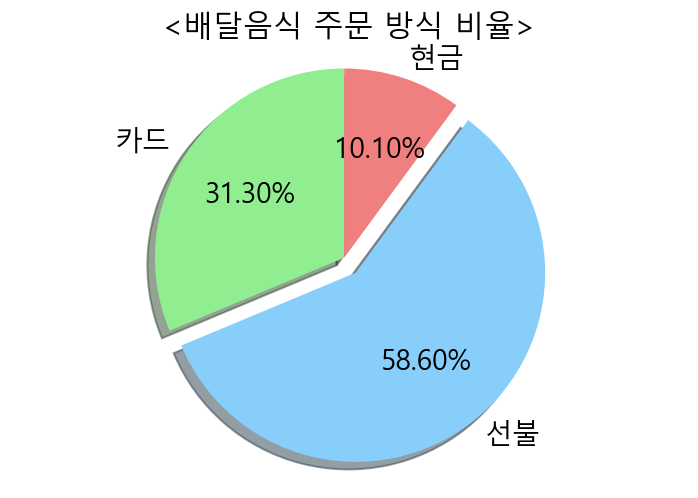

In [78]:
group_sizes= [31.3, 58.6, 10.1]
group_names = ['카드', '선불', '현금']
group_colors = ['lightgreen', 'lightskyblue', 'lightcoral']
group_explodes = (0,0.1, 0) # explode 1st slice

plt.pie(group_sizes, 
        explode=group_explodes, 
        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis

plt.title('<배달음식 주문 방식 비율>', fontsize=15)
%config InlineBackend.figure_format = 'retina'

plt.show()

In [79]:
Setle_Knd_Value = delivery.loc[delivery['SETLE_KND_VALUE'] == 2]
Setle_Knd_Value

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN
6,4577994,2020-01-01,C000049,1,C000049,S0022461,분식,1153010800,서울특별시,구로구,...,D0004461,3800,300,28000,2,NaN,2020-01-01 01:27:00,2020-01-01 01:27:47,2020-01-01 01:41:45,NaN
7,4577995,2020-01-01,C000238,1,C000238,S0001037,야식,4119010200,경기도,부천시,...,D0004936,3500,200,28500,2,NaN,2020-01-01 00:09:40,2020-01-01 00:17:31,2020-01-01 00:32:24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158317,10672686,2020-06-21,C000285,1,C000285,S0039139,분식,4117310400,경기도,안양시 동안구,...,D0006135,3300,300,13000,2,NaN,2020-06-21 23:42:11,2020-06-21 23:42:25,2020-06-21 23:48:58,NaN
5158318,10672687,2020-06-21,C000130,1,C000130,S0002269,분식,4128112300,경기도,고양시 덕양구,...,D0009720,3500,300,25000,2,NaN,2020-06-21 23:12:17,2020-06-21 23:12:31,2020-06-21 23:19:24,NaN
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
5158321,10672690,2020-06-21,C000130,1,C000130,S0042234,야식,4128112300,경기도,고양시 덕양구,...,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN


In [80]:
Setle_Knd_Value2 = delivery.loc[delivery['SETLE_KND_VALUE'] == 1]
Setle_Knd_Value2
Setle_Knd_Value2= Setle_Knd_Value2.groupby('PROCESS_DT')['SETLE_KND_VALUE'].sum().reset_index()
Setle_Knd_Value2

,PROCESS_DT,SETLE_KND_VALUE
0,2020-01-01,9220
1,2020-01-02,6438
2,2020-01-03,7941
3,2020-01-04,9304
4,2020-01-05,8921
...,...,...
160,2020-06-10,11836
161,2020-06-11,10709
162,2020-06-12,12298
163,2020-06-20,13264


In [81]:
Setle_Knd_Value= Setle_Knd_Value.groupby('PROCESS_DT')['SETLE_KND_VALUE'].sum().reset_index()
Setle_Knd_Value

,PROCESS_DT,SETLE_KND_VALUE
0,2020-01-01,36838
1,2020-01-02,25228
2,2020-01-03,29922
3,2020-01-04,34440
4,2020-01-05,37638
...,...,...
160,2020-06-10,38810
161,2020-06-11,35880
162,2020-06-12,41664
163,2020-06-20,50072


C:\Users\kimji\anaconda3\envs\lbd_env\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



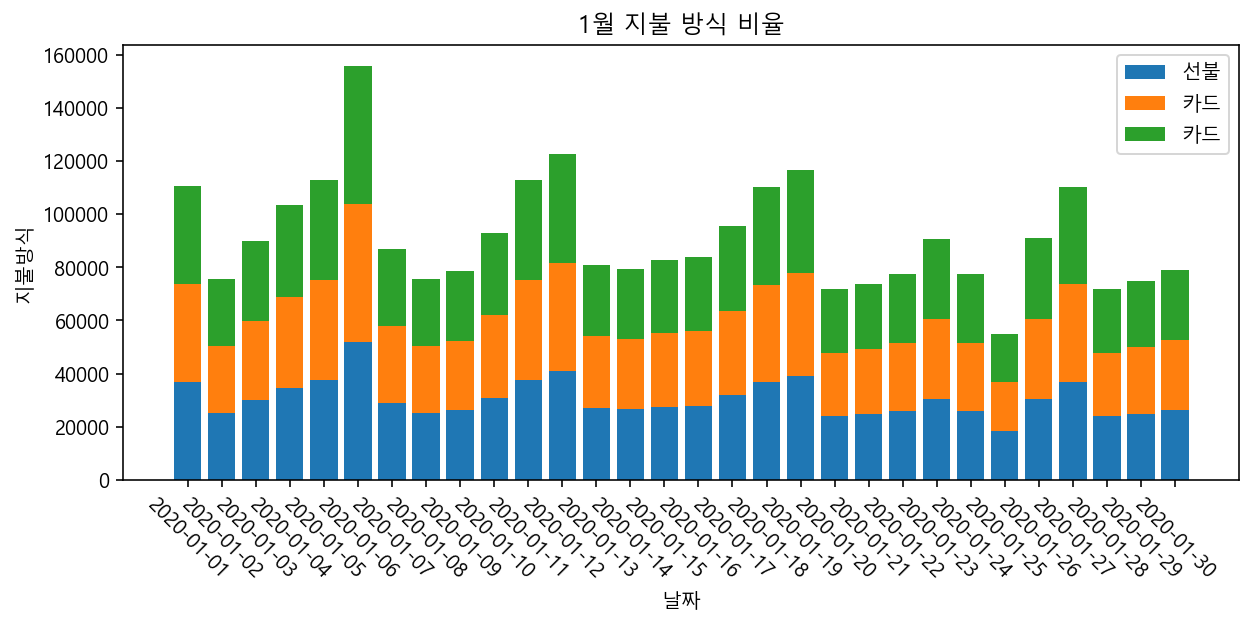

In [85]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(Setle_Knd_Value['PROCESS_DT'][:30],Setle_Knd_Value['SETLE_KND_VALUE'][:30], label='선불')
ax.bar(Setle_Knd_Value['PROCESS_DT'][:30],Setle_Knd_Value['SETLE_KND_VALUE'][:30], bottom=Setle_Knd_Value['SETLE_KND_VALUE'][:30],label='카드')
ax.bar(Setle_Knd_Value['PROCESS_DT'][:30],Setle_Knd_Value['SETLE_KND_VALUE'][:30], 
       bottom=Setle_Knd_Value['SETLE_KND_VALUE'][:30] + Setle_Knd_Value['SETLE_KND_VALUE'][:30],label='카드')

ax.set_xticklabels(Setle_Knd_Value['PROCESS_DT'], rotation=-45)
ax.set_xlabel('날짜')
ax.set_ylabel('지불방식')
ax.set_title('1월 지불 방식 비율')
ax.legend()
plt.show()

In [86]:
#코로나가 심해짐에 따라 변화가 있는지 보기 위해 시계열 데이터로 바꾸어줍니다. 

Setle_Knd_Value['PROCESS_DT'] = Setle_Knd_Value['PROCESS_DT'].astype('datetime64[ns]')
idx = pd.to_datetime(Setle_Knd_Value['PROCESS_DT'])
idx

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
160   2020-06-10
161   2020-06-11
162   2020-06-12
163   2020-06-20
164   2020-06-21
Name: PROCESS_DT, Length: 165, dtype: datetime64[ns]

In [102]:
a = list(Setle_Knd_Value['SETLE_KND_VALUE'])
ts = pd.Series(a, idx)
y = ts.resample('M').mean()
z = ts.resample('W').mean()
w= ts.resample('D').mean()

In [103]:
df= pd.DataFrame()
df['mean of Advanced payment'] = y
df2 =pd.DataFrame()
df2['mean of Advanced payment'] = z
df3=pd.DataFrame()
df3['Advanced payment']=w

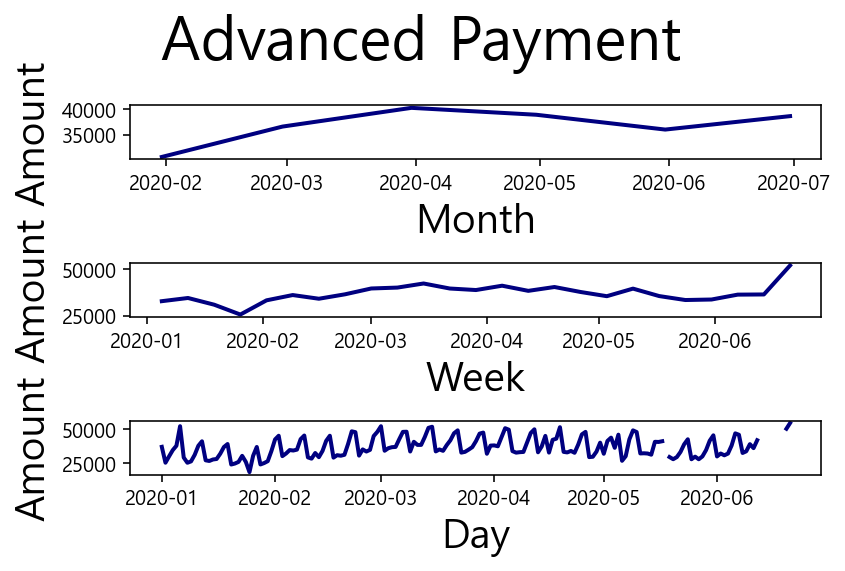

In [104]:
fig, ax = plt.subplots(3,1)
ax[0].plot(df.index, df['mean of Advanced payment'] , linewidth=2, color='navy')
ax[0].set_xlabel('Month', fontsize=20)
ax[0].set_ylabel('Amount', fontsize=20)

ax[1].plot(df2.index, df2['mean of Advanced payment'],linewidth=2, color='navy')
ax[1].set_xlabel('Week', fontsize=20)
ax[1].set_ylabel('Amount', fontsize=20)


ax[2].plot(df3.index, df3['Advanced payment'], linewidth=2, color='navy')
plt.xlabel('Day', fontsize=20)
plt.ylabel('Amount', fontsize=20)

plt.suptitle('Advanced Payment', fontsize= 30, zorder = 30)
plt.tight_layout()
plt.show()

In [111]:
policy = pd.read_csv("./Data/COVID_19/Policy.csv")
policy_sd = policy.loc[policy['type']=='Social']
idx = pd.to_datetime(policy_sd['start_date'])
a = list(policy_sd['detail'])
ts = pd.Series(a, idx)

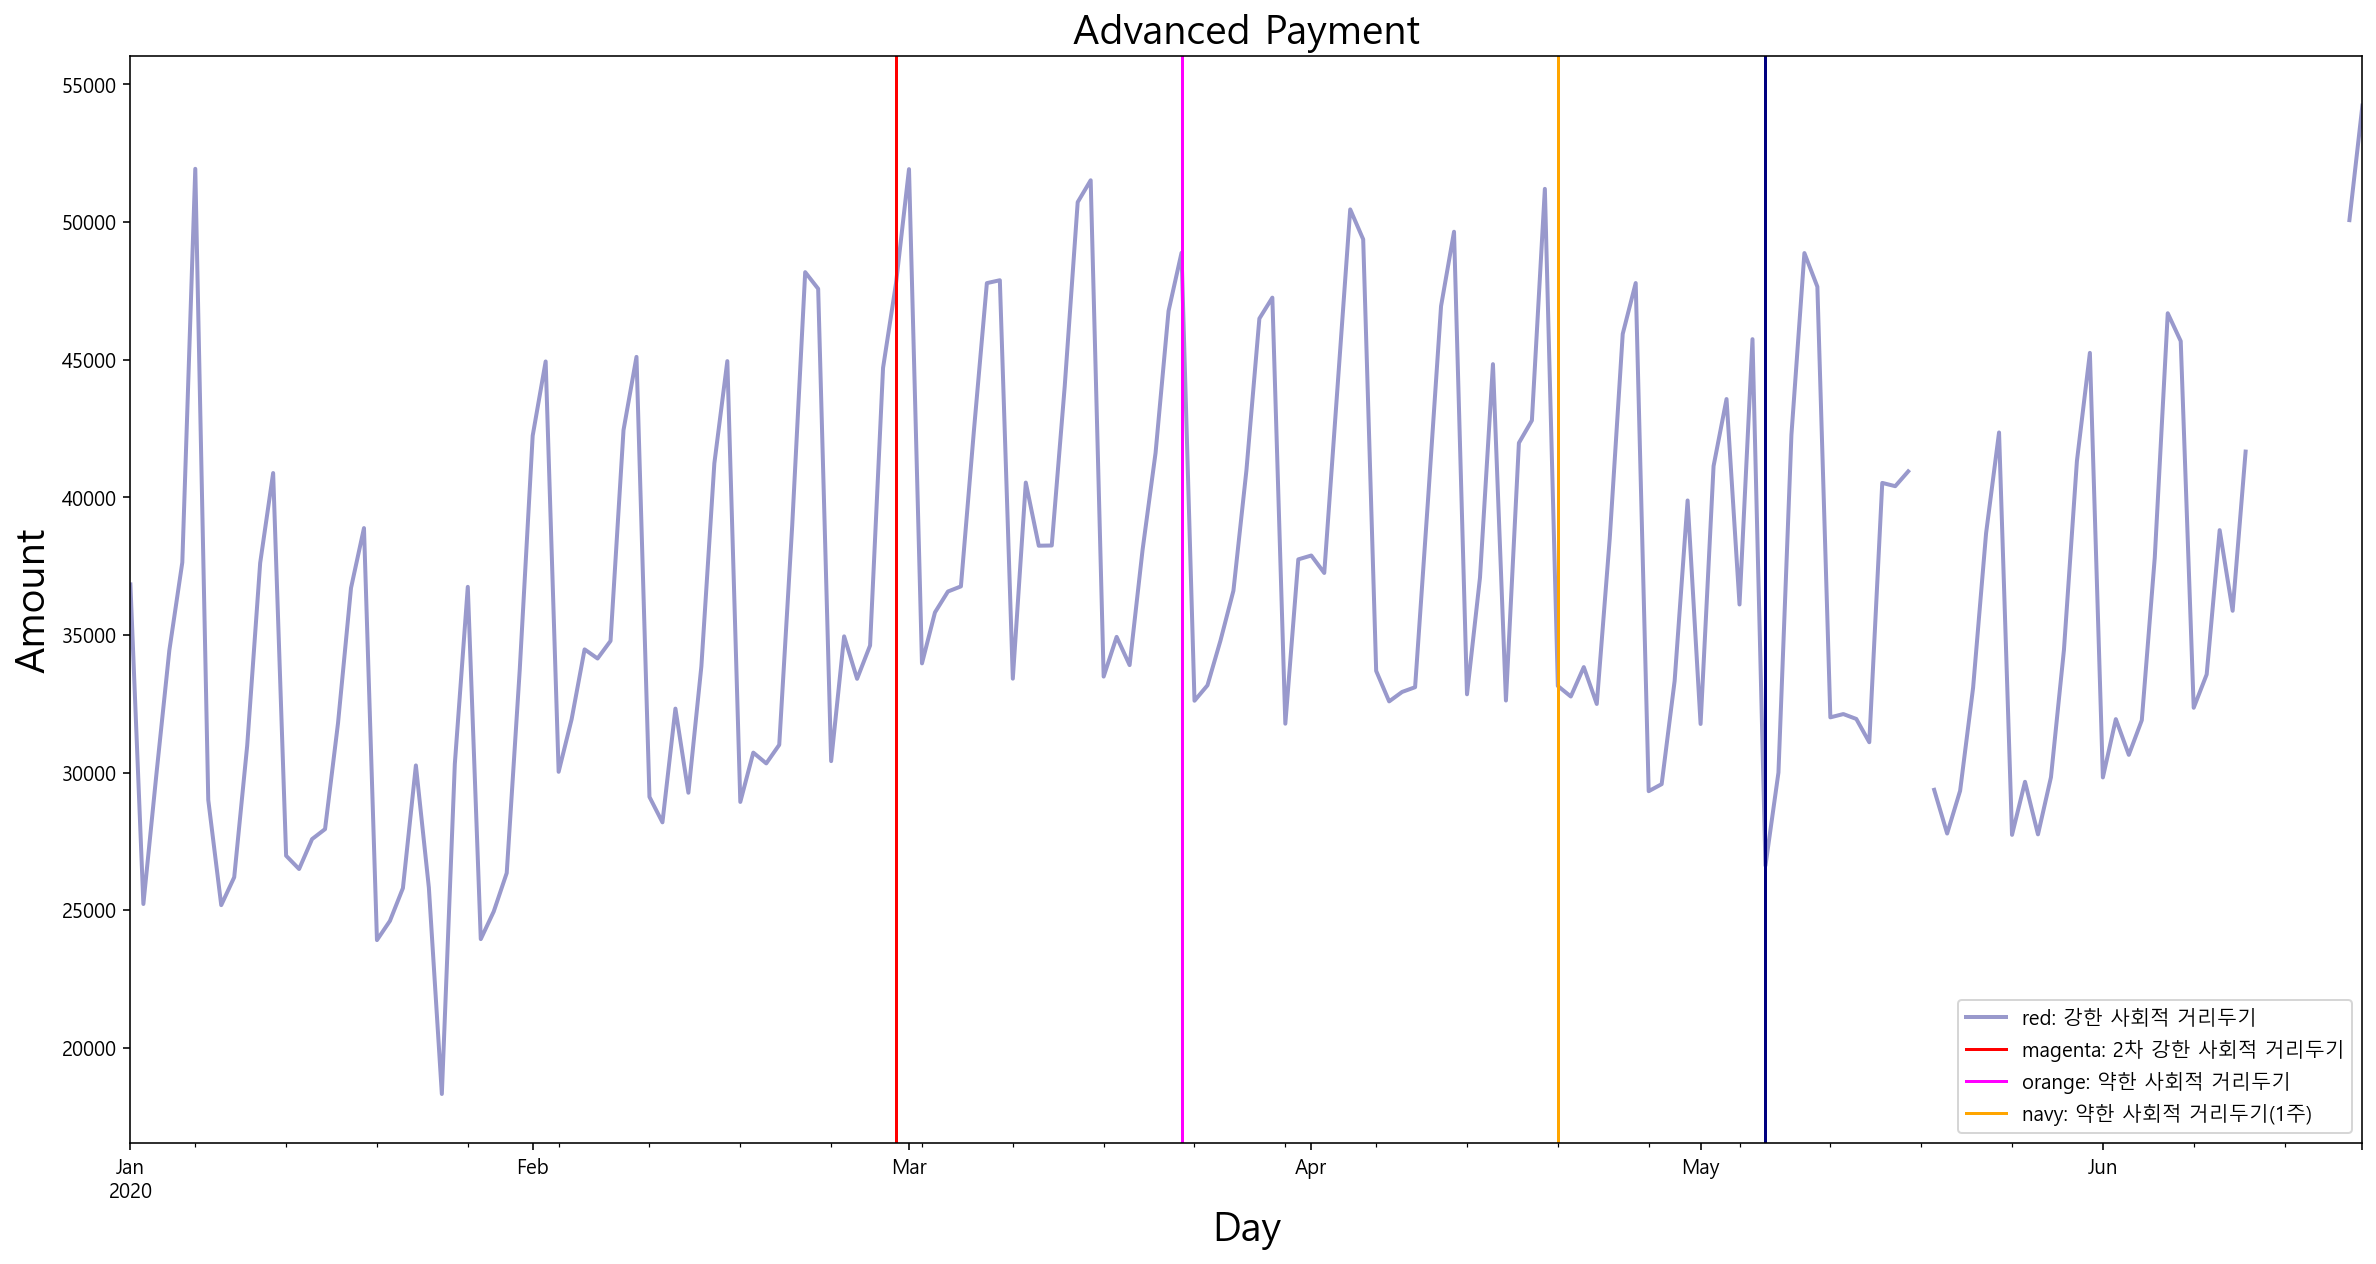

In [112]:
df3.plot(figsize = (20,10), linewidth=2, color='navy', alpha=0.4)
plt.title('Advanced Payment', fontsize= 20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Amount', fontsize=20)

plt.axvline(x='2020-02-29',color='red')
plt.axvline(x='2020-03-22',color='magenta', linestyle='-')
plt.axvline(x='2020-04-20', color='orange')
plt.axvline(x='2020-05-06', color='navy')

plt.legend(['red: 강한 사회적 거리두기', 'magenta: 2차 강한 사회적 거리두기', 'orange: 약한 사회적 거리두기','navy: 약한 사회적 거리두기(1주)'])
plt.show()

In [113]:
delivery

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158319,10672688,2020-06-21,C000312,1,C000312,S0029529,야식,4125010200,경기도,동두천시,...,D0013004,3000,500,26000,1,승인:하나카드,2020-06-21 22:48:22,2020-06-21 22:48:37,2020-06-21 23:07:47,NaN
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
5158321,10672690,2020-06-21,C000130,1,C000130,S0042234,야식,4128112300,경기도,고양시 덕양구,...,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN
5158322,10672691,2020-06-21,C000237,1,C000237,S0021766,족발/보쌈,4121010200,경기도,광명시,...,D0004485,3630,200,53700,1,승인:비씨카드사,2020-06-21 23:10:38,2020-06-21 23:11:03,2020-06-21 23:25:10,NaN


In [114]:
delivery['amount'] = delivery['DLVR_AMOUNT']+ delivery['CALL_RLAY_FEE_AMOUNT']+delivery2['GOODS_AMOUNT']

In [115]:
delivery['DLVR_STORE_INDUTY_NM'].unique()
delivery.groupby('DLVR_STORE_INDUTY_NM')

In [118]:
delivery['PROCESS_DT'] = delivery['PROCESS_DT'].astype('datetime64[ns]')
idx = pd.to_datetime(delivery['PROCESS_DT'])
idx
a = list(delivery['amount'])
ts = pd.Series(a, idx)
y = ts.resample('M').mean()
z = ts.resample('W').mean()

df= pd.DataFrame()
df2 = pd.DataFrame()

df['Delivery amount(mean) by Month '] = y
df2['Delivery amount(mean) by Week'] =z 

Amount = df['Delivery amount(mean) by Month '].to_numpy()
Amount2 = df2['Delivery amount(mean) by Week'].to_numpy()

df


,Delivery amount(mean) by Month
2020-01-31,1723908.0
2020-02-29,NaN
2020-03-31,NaN
2020-04-30,NaN
2020-05-31,NaN
2020-06-30,NaN
